In [25]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
pi = np.array([-0.7 , 2.2 , 0.5 , 1.0])

In [27]:
def generate_data(N):
    x = np.random.uniform(-1,1,N)
    y = np.random.normal(np.polyval(pi,x),0.2,N)
    return x,y

In [28]:
def plot(ax,train_x,train_y,p_trained,p_true):
    xi = np.linspace(-1,1,1001)
    yi = np.polyval(pi,xi)
    ax.plot(xi,yi,label = 'true')
    yi = np.polyval(p_trained,xi)
    ax.plot(xi,yi,label = 'trained')
    ax.scatter(train_x,train_y, alpha = 0.5, c = 'k')
    ax.set_ylim(-4,4)
    ax.legend()

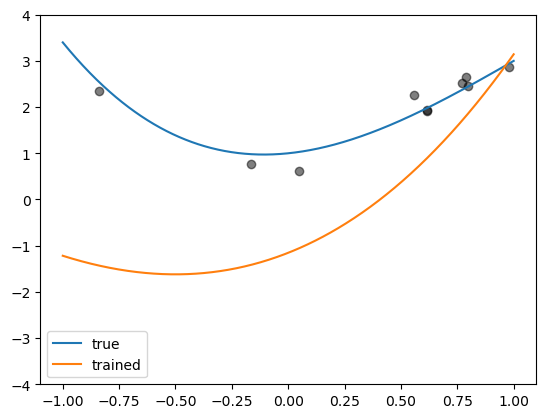

In [29]:
f = plt.figure()
x,y = generate_data(10)
plot(f.gca(),x,y,np.random.normal(size = (4,)), pi)

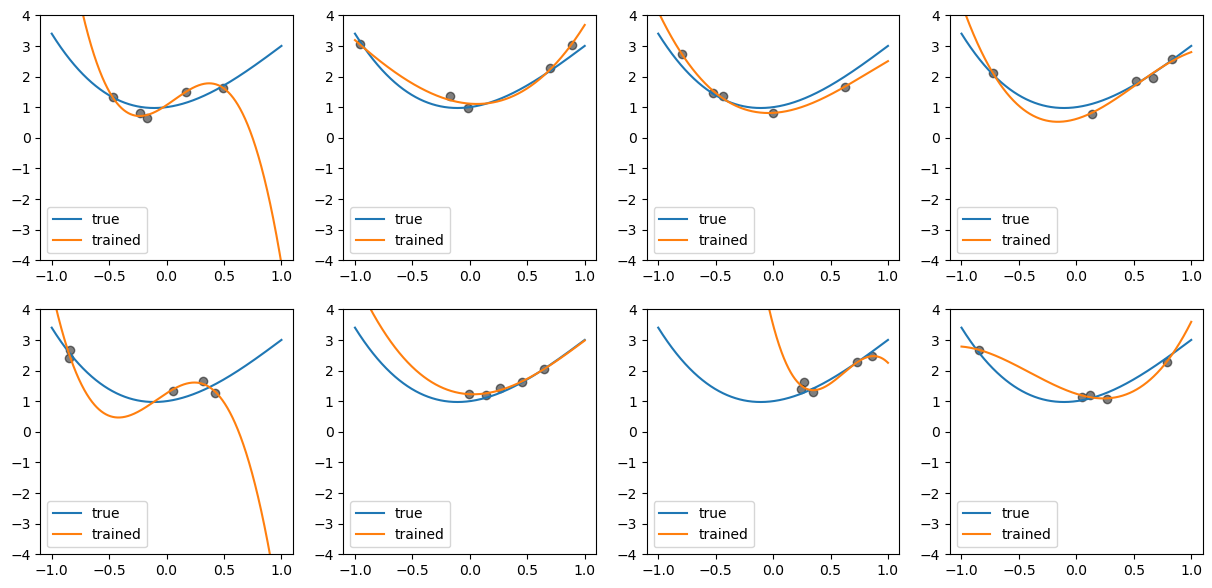

In [32]:
def learn(train_x,train_y,degree):
    X = np.column_stack([train_x**d for d in reversed(range(degree))])
    w = np.linalg.inv(X.T@X) @ X.T @ train_y
    return w

f2,ax_arr = plt.subplots(2,4)
for ax in ax_arr.ravel():
    x2,y2 = generate_data(5)
    plot(ax,x2,y2,learn(x2,y2,4), pi)
f2.set_size_inches(15,7)

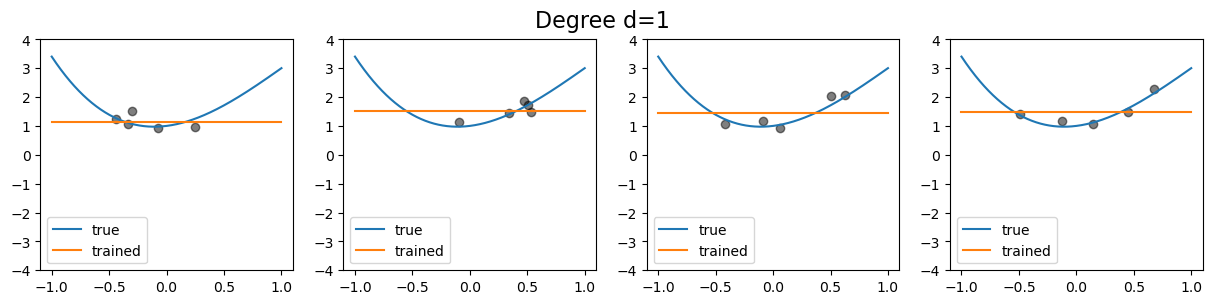

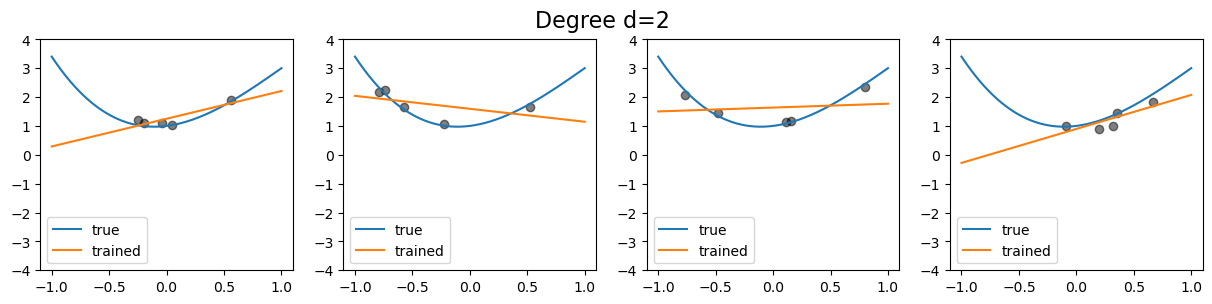

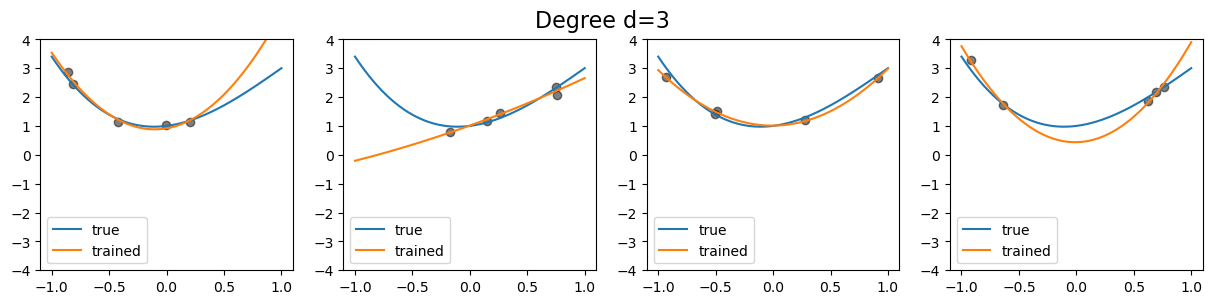

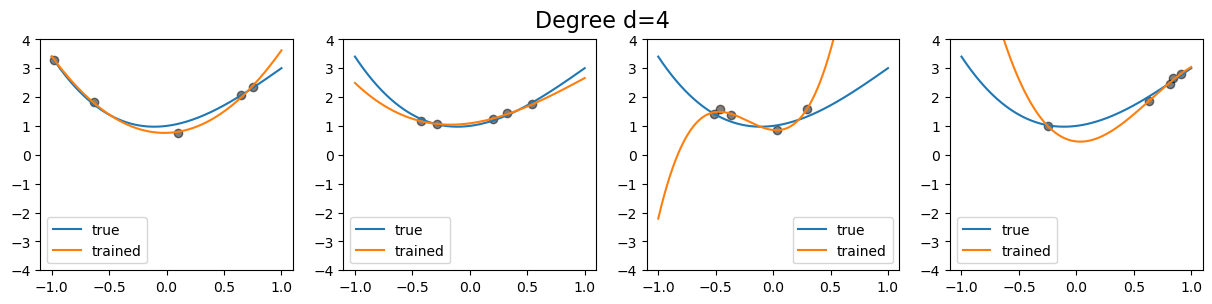

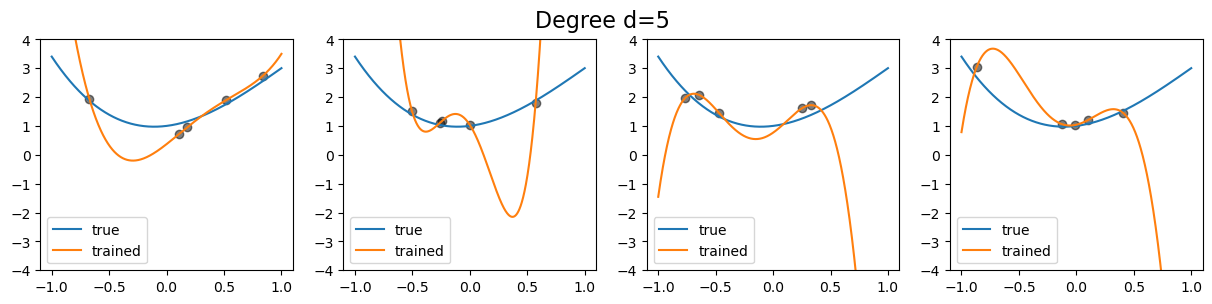

In [33]:
for i in range(1,6):
    f3,ax_arr = plt.subplots(1,4)
    f3.suptitle(f"Degree d={i}",fontsize=16)
    for ax in ax_arr.ravel():
        x2,y2 = generate_data(5)
        plot(ax,x2,y2,learn(x2,y2,i), pi)
    f3.set_size_inches(15,3)

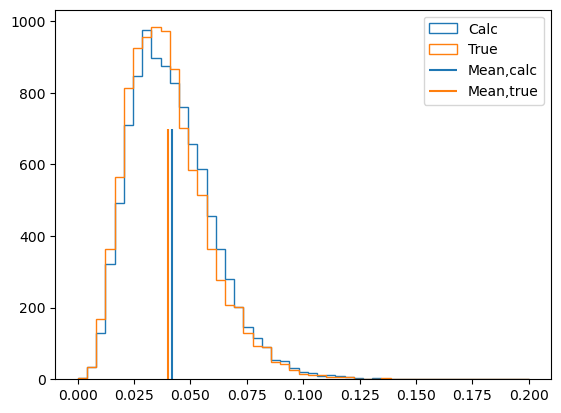

In [49]:
def risk(x,y_true, trained_coeffs):
    f_x = np.polyval(trained_coeffs,x)
    L = np.mean((y_true - f_x)**2)
    return L

x_trained,y_trained = generate_data(100)
coeff = learn(x_trained,y_trained,4)
risk_val = np.zeros(10000)
risk_true = np.zeros(10000)
for i in range(10000):
    x,y = generate_data(10)
    risk_val[i] = risk(x,y,coeff)
    xt,yt = generate_data(10)
    risk_true[i] = risk(xt,yt,pi)
    
plt.figure()
plt.hist(risk_val,label="Calc",bins=np.linspace(0,0.2),histtype="step")
plt.hist(risk_true,label="True",bins=np.linspace(0,0.2),histtype="step")
plt.vlines(risk_val.mean(),0,700,colors = 'C0',label="Mean,calc")
plt.vlines(risk_true.mean(),0,700,colors = 'C1',label="Mean,true")
plt.legend()
plt.show()